In [1]:
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import h5py

data = np.genfromtxt("EAGLE_simulations_DMfractions_ReferenceL100N1504.txt")
Mstellar = 10**data[:,2]
Rhalf = data[:,3]
Reff = data[:, 8]
kappa = data[:, 7]
fDM = data[:, 9]
M200 = 10**data[:, 6]


def plot_median_relation(ax, bins, x, y, color):

    num_bins = len(bins)
    indx = np.digitize(x, bins)
    p_bins_medians = np.array([np.median(x[indx == idx]) for idx in np.arange(num_bins) if len(x[indx==idx])>5])
    r_bins_medians = np.array([np.median(y[indx == idx]) for idx in np.arange(num_bins) if len(x[indx==idx])>5])
    ax.plot(p_bins_medians, r_bins_medians, lw=3, color='white')
    ax.plot(p_bins_medians, r_bins_medians, lw=2, color=color)
    
    r_bins_16 = np.array([np.percentile(y[indx == idx], 16) for idx in np.arange(num_bins) if len(x[indx==idx])>5]) # Here we request each bin to contain at least x galaxies
    r_bins_84 = np.array([np.percentile(y[indx == idx], 84) for idx in np.arange(num_bins) if len(x[indx==idx])>5]) 
    ax.plot(p_bins_medians, r_bins_16, '--', color=color)
    ax.plot(p_bins_medians, r_bins_84, '--', color=color)
    ax.fill_between(p_bins_medians, r_bins_16, r_bins_84, color=color, alpha=0.15,)


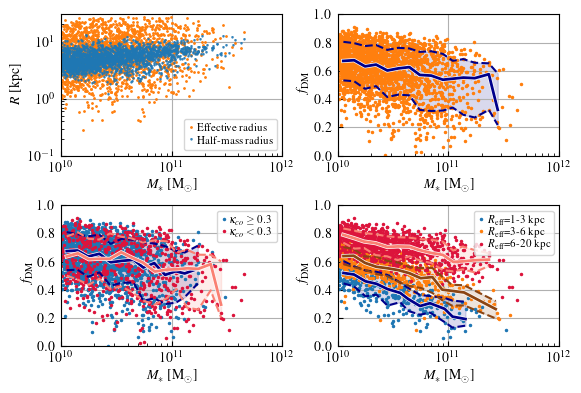

In [2]:
#Plot parameters
params = {
    "font.size": 10,
    "font.family": "Times",
    "text.usetex": True,
    "figure.figsize": (6, 4),
    "figure.subplot.left": 0.12,
    "figure.subplot.right": 0.95,
    "figure.subplot.bottom": 0.12,
    "figure.subplot.top": 0.95,
    "figure.subplot.wspace": 0.25,
    "figure.subplot.hspace": 0.35,
    "lines.markersize": 6,
    "lines.linewidth": 1.5,
    "figure.max_open_warning": 0,
}
rcParams.update(params)

plt.figure()
ax = plt.subplot(2, 2, 1)
plt.grid(True)

plt.plot(Mstellar, Reff, 'o', ms=1., color='tab:orange',label='Effective radius')
plt.plot(Mstellar, Rhalf, 'v', ms=1., color='tab:blue',label='Half-mass radius')

plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$M_{*}$ [M$_{\odot}$]')
plt.ylabel(r'$R$ [kpc]')
plt.axis([1e10, 1e12, 0.1, 30])
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)
plt.legend(labelspacing=0.2, handlelength=0.5, handletextpad=0.3, frameon=True, ncol=1, columnspacing=0.1, fontsize=8)

####
ax = plt.subplot(2, 2, 2)
plt.grid(True)

plt.plot(Mstellar, fDM, 'o', ms=1.5, color='tab:orange')

bins = np.arange(10,12.2,0.1)
bins = 10**bins
plot_median_relation(ax, bins, Mstellar, fDM, 'darkblue')


plt.xscale('log')
plt.xlabel(r'$M_{*}$ [M$_{\odot}$]')
plt.ylabel(r'$f_{\mathrm{DM}}$')
plt.axis([1e10, 1e12, 0, 1])
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)


####
ax = plt.subplot(2, 2, 3)
plt.grid(True)

plt.plot(Mstellar[kappa>=0.3], fDM[kappa>=0.3], 'o', ms=1.5, color='tab:blue',label=r'$\kappa_{co}\ge 0.3$')
plt.plot(Mstellar[kappa<0.3], fDM[kappa<0.3], 'o', ms=1.5, color='crimson',label=r'$\kappa_{co}<0.3$')

plot_median_relation(ax, bins, Mstellar[kappa>=0.3], fDM[kappa>=0.3], 'darkblue')
plot_median_relation(ax, bins, Mstellar[kappa<0.3], fDM[kappa<0.3], 'salmon')

plt.xscale('log')
plt.xlabel(r'$M_{*}$ [M$_{\odot}$]')
plt.ylabel(r'$f_{\mathrm{DM}}$')
plt.axis([1e10, 1e12, 0, 1])
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)
plt.legend(labelspacing=0.2, handlelength=0.5, handletextpad=0.3, frameon=True, ncol=1, columnspacing=0.1, fontsize=8)

####
ax = plt.subplot(2, 2, 4)
plt.grid(True)

select_low = np.where((Reff>1) & (Reff<=3))[0]
select_mid = np.where((Reff>3) & (Reff<=6))[0]
select_high = np.where((Reff>6) & (Reff<=20))[0]

plt.plot(Mstellar[select_low], fDM[select_low], 'o', ms=1.5, color='tab:blue',label='$R_{\mathrm{eff}}$=1-3 kpc')
plt.plot(Mstellar[select_mid], fDM[select_mid], 'o', ms=1.5, color='tab:orange',label='$R_{\mathrm{eff}}$=3-6 kpc')
plt.plot(Mstellar[select_high], fDM[select_high], 'o', ms=1.5, color='crimson',label='$R_{\mathrm{eff}}$=6-20 kpc')

plot_median_relation(ax, bins, Mstellar[select_low], fDM[select_low], 'darkblue')
plot_median_relation(ax, bins, Mstellar[select_mid], fDM[select_mid], 'saddlebrown')
plot_median_relation(ax, bins, Mstellar[select_high], fDM[select_high], 'salmon')

plt.xscale('log')
plt.xlabel(r'$M_{*}$ [M$_{\odot}$]')
plt.ylabel(r'$f_{\mathrm{DM}}$')
plt.axis([1e10, 1e12, 0, 1])
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)
plt.legend(labelspacing=0.2, handlelength=0.5, handletextpad=0.3, frameon=True, ncol=1, columnspacing=0.1, fontsize=8)

plt.savefig("EAGLE_data.png", dpi=300)
plt.show()
plt.close()

In [11]:
file_path = "/Users/cc276407/Simulation_data/snellius/TangoSIDM/L025N376/Reference/SigmaConstant00/"
with h5py.File(file_path+"Halo_data_DMFractionsReferenceSigmaConstant00.hdf5", "r") as file:
    halo_data_group = file["Halo_data"]
    Mstellar_TangoSIDM = halo_data_group["Mstar"][:]
    Mstellar_TangoSIDM = 10**Mstellar_TangoSIDM
    fDM_TangoSIDM = halo_data_group["fDM_Reff3D"][:]

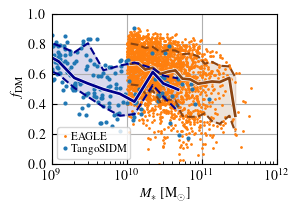

In [12]:
#Plot parameters
params = {
    "font.size": 10,
    "font.family": "Times",
    "text.usetex": True,
    "figure.figsize": (3, 2),
    "figure.subplot.left": 0.2,
    "figure.subplot.right": 0.95,
    "figure.subplot.bottom": 0.2,
    "figure.subplot.top": 0.95,
    "figure.subplot.wspace": 0.25,
    "figure.subplot.hspace": 0.35,
    "lines.markersize": 6,
    "lines.linewidth": 1.5,
    "figure.max_open_warning": 0,
}
rcParams.update(params)

plt.figure()
ax = plt.subplot(1, 1, 1)
plt.grid(True)

plt.plot(Mstellar, fDM, 'o', ms=1., color='tab:orange',label='EAGLE')
plt.plot(Mstellar_TangoSIDM, fDM_TangoSIDM, 'o', ms=2., color='tab:blue',label='TangoSIDM')

bins = np.arange(10,12.2,0.1)
bins = 10**bins
plot_median_relation(ax, bins, Mstellar, fDM, 'saddlebrown')

bins = np.arange(9,12.2,0.2)
bins = 10**bins
plot_median_relation(ax, bins, Mstellar_TangoSIDM, fDM_TangoSIDM, 'darkblue')

plt.xscale('log')
plt.xlabel(r'$M_{*}$ [M$_{\odot}$]')
plt.ylabel(r'$f_{\mathrm{DM}}$')
plt.axis([1e9, 1e12, 0, 1])
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)
plt.legend(labelspacing=0.2, handlelength=0.5, handletextpad=0.3, frameon=True, ncol=1, columnspacing=0.1, fontsize=8)

plt.savefig("EAGLE_TangoSIDM_comparison.png", dpi=300)
plt.show()